In [1]:
# Downloading Dataset

In [2]:
from urllib.request import urlretrieve

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x19c12d8fd48>)

# Importing Pandas Library

In [4]:
import pandas as pd

In [5]:
# reading csv file
covid_df = pd.read_csv('italy-covid-daywise.csv')

Data from the file is read and stored in a `DataFrame` object - one of the core data structures in Pandas for storing and working with tabular data. We typically use the `_df` suffix in the variable names for dataframes.

In [6]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [7]:
type(covid_df)

pandas.core.frame.DataFrame

In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


It appears that each column contains values of a specific data type. You can view statistical information for numerical columns (mean, standard deviation, minimum/maximum values, and the number of non-empty values) using the `.describe` method.

In [9]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


The columns property contains the list of columns within the data frame.

In [10]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [11]:
covid_df.shape

(248, 4)

Here's a summary of the functions & methods we've looked at so far:

* `pd.read_csv` - Read data from a CSV file into a Pandas `DataFrame` object
* `.info()` - View basic infomation about rows, columns & data types
* `.describe()` - View statistical information about numeric columns
* `.columns` - Get the list of column names
* `.shape` - Get the number of rows & columns as a tuple

# Retrieving Data from a data frame


The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: keys are column names, and values are lists/arrays containing data for the respective columns. 

In [12]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Representing data in the above format has a few benefits:

* All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
* Retrieving the values for a particular row simply requires extracting the elements at a given index from each column array.
* The representation is more compact (column names are recorded only once) compared to other formats that use a dictionary for each row of data (see the example below).

In [13]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

With the dictionary of lists analogy in mind, you can now guess how to retrieve data from a data frame. For example, we can get a list of values from a specific column using the `[]` indexing notation.

In [14]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column is represented using a data structure called `Series`, which is essentially a numpy array with some extra methods and properties.

In [15]:
type(covid_df['new_cases'])

pandas.core.series.Series

Like arrays, you can retrieve a specific value with a series using the indexing notation `[]`.

In [16]:
covid_df['new_cases'][246]

975.0

In [17]:
covid_df['new_tests'][200]

27569.0

Pandas also provides the `.at` method to retrieve the element at a specific row & column directly.

In [18]:
covid_df.at[230,'new_tests']

21379.0

Instead of using the indexing notation `[]`, Pandas also allows accessing columns as properties of the dataframe using the `.` notation. However, this method only works for columns whose names do not contain spaces or special characters.

In [19]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Further, you can also pass a list of columns within the indexing notation `[]` to access a subset of the data frame with just the given columns.

In [20]:
covid_df[['date','new_cases']]

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


The new data frame `cases_df` is simply a "view" of the original data frame `covid_df`. Both point to the same data in the computer's memory. Changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast. You needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.

Sometimes you might need a full copy of the data frame, in which case you can use the `copy` method.

In [21]:
covid_df_copy = covid_df.copy()

In [22]:
covid_df_copy.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


To access a specific row of data, Pandas provides the `.loc` method.

In [23]:
covid_df.loc[230]

date          2020-08-17
new_cases            477
new_deaths             4
new_tests          21379
Name: 230, dtype: object

In [24]:
type(covid_df.loc[230])

pandas.core.series.Series

We can use the `.head` and `.tail` methods to view the first or last few rows of data.

In [25]:
covid_df.head(20)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [26]:
covid_df.tail(20)

,date,new_cases,new_deaths,new_tests
228,2020-08-15,574.0,3.0,25937.0
229,2020-08-16,629.0,158.0,22470.0
230,2020-08-17,477.0,4.0,21379.0
231,2020-08-18,320.0,4.0,32687.0
232,2020-08-19,401.0,5.0,41290.0
233,2020-08-20,642.0,7.0,49662.0
234,2020-08-21,840.0,6.0,44943.0
235,2020-08-22,947.0,9.0,46613.0
236,2020-08-23,1071.0,3.0,47463.0
237,2020-08-24,1209.0,7.0,33358.0


The distinction between `0` and `NaN` is subtle but important. In this dataset, it represents that daily test numbers were not reported on specific dates. Italy started reporting daily tests on Apr 19, 2020. 93,5310 tests had already been conducted before Apr 19. 

We can find the first index that doesn't contain a `NaN` value using a column's `first_valid_index` method.

In [27]:
covid_df.new_tests.first_valid_index()

111

In [28]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


We can use the `.sample` method to retrieve a random sample of rows from the data frame.

In [29]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
184,2020-07-02,182.0,21.0,29147.0
235,2020-08-22,947.0,9.0,46613.0
171,2020-06-19,331.0,66.0,28570.0
91,2020-03-31,4050.0,810.0,NaN
54,2020-02-23,62.0,2.0,NaN
176,2020-06-24,113.0,18.0,30237.0
227,2020-08-14,522.0,6.0,24868.0
2,2020-01-02,0.0,0.0,NaN
27,2020-01-27,0.0,0.0,NaN
60,2020-02-29,238.0,4.0,NaN


Notice that even though we have taken a random sample, each row's original index is preserved - this is a useful property of data frames.


Here's a summary of the functions & methods we looked at in this section:

- `covid_df['new_cases']` - Retrieving columns as a `Series` using the column name
- `new_cases[243]` - Retrieving values from a `Series` using an index
- `covid_df.at[243, 'new_cases']` - Retrieving a single value from a data frame
- `covid_df.copy()` - Creating a deep copy of a data frame
- `covid_df.loc[243]` - Retrieving a row or range of rows of data from the data frame
- `head`, `tail`, and `sample` - Retrieving multiple rows of data from the data frame
- `covid_df.new_tests.first_valid_index` - Finding the first non-empty index in a series


# Analyzing data from data frames

Let's try to answer some questions about our data.

Q: What are the total number of reported cases and deaths related to Covid-19 in Italy?

Similar to Numpy arrays, a Pandas series supports the sum method to answer these questions.

In [30]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [34]:
print("The total number of cases : {0}\nThe total number of deaths : {1}".format(int(total_cases),int(total_deaths)))

The total number of cases : 271515
The total number of deaths : 35497


 **Q: What is the overall death rate (ratio of reported deaths to reported cases)?**

In [38]:
death_rate = (covid_df.new_deaths.sum() / covid_df.new_cases.sum())*100

In [41]:
print("The death rate : ",death_rate," % ")

The death rate :  13.073679170579894  % 


**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**

In [42]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [43]:
total_tests

5214766.0

**Q: What fraction of tests returned a positive result?**

In [45]:
positive_rate = total_cases / total_tests

In [46]:
positive_rate

0.05206657403227681

# Querying and Sorting Rows

## Querying and sorting rows

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [47]:
high_new_cases = covid_df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

The boolean expression returns a series containing `True` and `False` boolean values. You can use this series to select a subset of rows from the original dataframe, corresponding to the `True` values in the series.

In [48]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can write this succinctly on a single line by passing the boolean expression as an index to the data frame.

In [49]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [50]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall `positive_rate`.

In [51]:
positive_rate

0.05206657403227681

In [52]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [53]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


The result of performing an operation on two columns is a new series.

In [54]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

We can use this series to add a new column to the data frame.

In [55]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [56]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this `positive_rate` column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the `positive_rate` column using the `drop` method.

In [57]:
covid_df.drop(columns=['positive_rate'], inplace=True)

### Sorting rows using column values

The rows can also be sorted by a specific column using `.sort_values`. Let's sort to identify the days with the highest number of cases, then chain it with the `head` method to list just the first ten results.

In [58]:
covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [60]:
covid_df.sort_values('new_deaths',ascending = False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


It appears that daily deaths hit a peak just about a week after the peak in daily new cases.

Let's also look at the days with the least number of cases. We might expect to see the first few days of the year on this list.

In [61]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


It seems like the count of new cases on Jun 20, 2020, was `-148`, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at some days before and after Jun 20, 2020.

In [62]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


For now, let's assume this was indeed a data entry error. We can use one of the following approaches for dealing with the missing or faulty value:
1. Replace it with `0`.
2. Replace it with the average of the entire column
3. Replace it with the average of the values on the previous & next date
4. Discard the row entirely

Which approach you pick requires some context about the data and the problem. In this case, since we are dealing with data ordered by date, we can go ahead with the third approach.

You can use the `.at` method to modify a specific value within the dataframe.

In [64]:
covid_df.at[172,'new_cases'] = (covid_df.at[171,'new_cases'] + covid_df.at[173,'new_cases'])/2
covid_df.at[172,'new_cases']

297.5

Here's a summary of the functions & methods we looked at in this section:

- `covid_df.new_cases.sum()` - Computing the sum of values in a column or series
- `covid_df[covid_df.new_cases > 1000]` - Querying a subset of rows satisfying the chosen criteria using boolean expressions
- `df['pos_rate'] = df.new_cases/df.new_tests` - Adding new columns by combining data from existing columns
- `covid_df.drop('positive_rate')` - Removing one or more columns from the data frame
- `sort_values` - Sorting the rows of a data frame using column values
- `covid_df.at[172, 'new_cases'] = ...` - Replacing a value within the data frame

# Working With Dates



While we've looked at overall numbers for the cases, tests, positive rate, etc., it would also be useful to study these numbers on a month-by-month basis. The `date` column might come in handy here, as Pandas provides many utilities for working with dates.

In [65]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [66]:
covid_df.date = pd.to_datetime(covid_df.date)

In [67]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

You can see that it now has the datatype `datetime64`. We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class ([view docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)).

In [68]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

Note : For weekday, Monday - 0 and Sunday - 6

In [69]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5


Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the `sum` method to aggregate each selected column's values.

In [73]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may_metrics = covid_df_may[['new_cases','new_deaths','new_tests']]
# get the column wise sum
covid_df_may_totals = covid_df_may_metrics.sum()
covid_df_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [74]:
type(covid_df_may_totals)

pandas.core.series.Series

As another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate columns using the `.mean` method.

In [75]:
# Overall average
covid_df.new_cases.mean()

1096.6149193548388

In [76]:
# Average for sundays
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

It seems like more cases were reported on Sundays compared to other days.

## Grouping and aggregation

As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the `sum` method. 

In [77]:
covid_month_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].sum()


In [78]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [79]:
covid_monthwise_mean_df = covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].mean()


In [80]:
covid_monthwise_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.

In [81]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

In [82]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


## Merging data from multiple sources

To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population. Let's download another file `locations.csv` that contains health-related information for many countries, including Italy.

In [88]:
from urllib.request import urlretrieve 
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x19c151b5288>)

In [89]:
locations_df = pd.read_csv('locations.csv')

In [90]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [91]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a `location` column in the `covid_df` dataframe with all values set to `"Italy"`.

In [92]:
covid_df['location'] = "Italy"

In [93]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.

In [94]:
merged_df = covid_df.merge(locations_df, on="location")

In [95]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million, deaths per million, and tests per million.

In [96]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [97]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [98]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [99]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


## Bonus: Basic Plotting with Pandas

We generally use a library like `matplotlib` or `seaborn` plot graphs within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.

Let's plot a line graph showing how the number of daily cases varies over time.

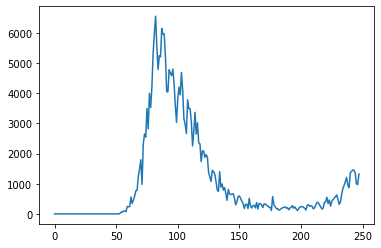

In [102]:
merged_df.new_cases.plot();

While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.

In [103]:
merged_df.set_index('date',inplace=True)

In [104]:
merged_df

,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403


In [105]:
# you can access rows with the help of loc since index is a date one
merged_df.loc['2020-09-01']

new_cases                             996
new_deaths                              6
new_tests                           54395
year                                 2020
month                                   9
day                                     1
weekday                                 1
total_cases                        269660
total_deaths                        35483
total_tests                   5.21477e+06
location                            Italy
continent                          Europe
population                    6.04618e+07
life_expectancy                     83.51
hospital_beds_per_thousand           3.18
gdp_per_capita                    35220.1
cases_per_million                    4460
deaths_per_million                586.866
tests_per_million                 86248.9
Name: 2020-09-01 00:00:00, dtype: object

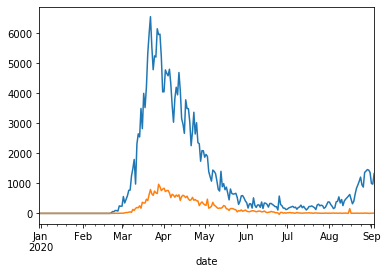

In [106]:
merged_df.new_cases.plot()
merged_df.new_deaths.plot();

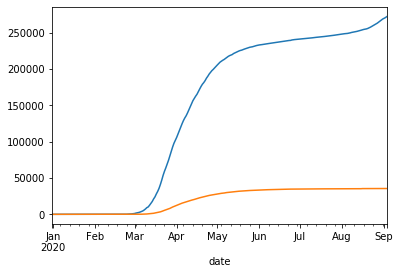

In [108]:
merged_df.total_cases.plot()
merged_df.total_deaths.plot();

In [110]:
death_rate = merged_df.total_deaths / merged_df.total_cases

In [111]:
death_rate


date
2019-12-31         NaN
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
                ...   
2020-08-30    0.132709
2020-08-31    0.132050
2020-09-01    0.131584
2020-09-02    0.131140
2020-09-03    0.130523
Length: 248, dtype: float64

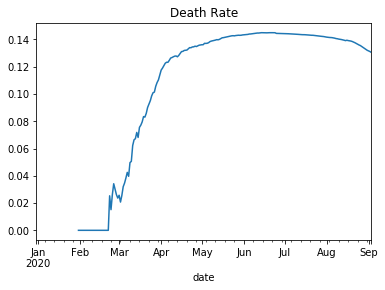

In [112]:
death_rate.plot(title='Death Rate')

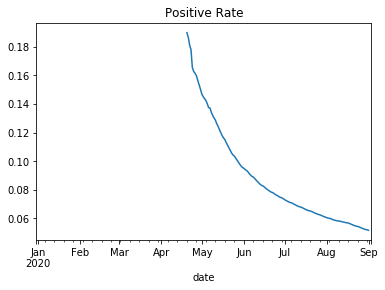

In [115]:
positive_rates = merged_df.total_cases / merged_df.total_tests
positive_rates.plot(title='Positive Rate');

In [116]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


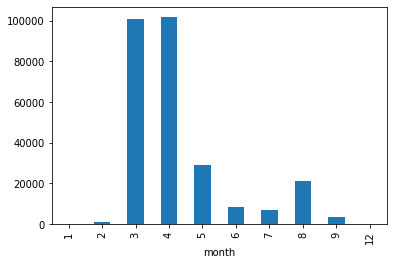

In [119]:
covid_month_df.new_cases.plot(kind='bar');


In [ ]:
covid_month_df.new_deaths.plot(kind='bar');